In [376]:
import requests
import pandas as pd
import math
import numpy as np
import requests
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
from ftplib import FTP
import os
import rioxarray
import xarray as xr
import math

import shapely
import geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Point

from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

In [375]:
%pip install basemap basemap-data-hires descartes


  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/home/glefait/.virtualenvs/notebooks/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/tmp/ipykernel_282813/2897496478.py:19: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subpoly in poly:
/home/glefait/.virtualenvs/notebooks/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


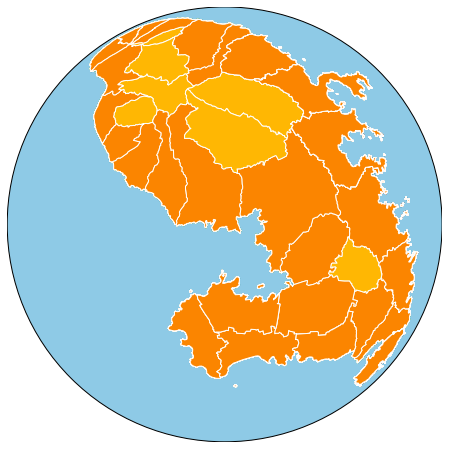

In [448]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
map = Basemap(satellite_height=120.,
              projection='nsper', resolution='h', lat_0=14.6, lon_0=-61.05,
    )
map.drawmapboundary(fill_color='#8ecae6')
#map.fillcontinents(color='coral',lake_color='aqua')
#map.drawcoastlines()

COMMUNES_FILES = 'data/communes-martinique.geojson'
gdf = gpd.read_file(COMMUNES_FILES)
gdf['color'] = np.where(gdf.nom.isin(['Ajoupa-Bouillon', 'Morne-Rouge', 'Morne-Vert', 'Fonds-Saint-Denis', 'Gros-Morne', 'Saint-Joseph', 'Saint-Esprit']), '#ffb703', '#fb8500')

for poly, color in zip(gdf.geometry, gdf.color):
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(map, poly)
        patches.append(PolygonPatch(mpoly, color=color, ec='white'))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(map, poly)
            patches.append(PolygonPatch(mpoly, color=color,  ec='white'))
    else:
        print(poly, " is neither a polygon nor a multi-polygon. Skipping it.")
_  = ax.add_collection(PatchCollection(patches, match_original=True))

fig.savefig(f'output/2022-11-19.png') #, facecolor='white')

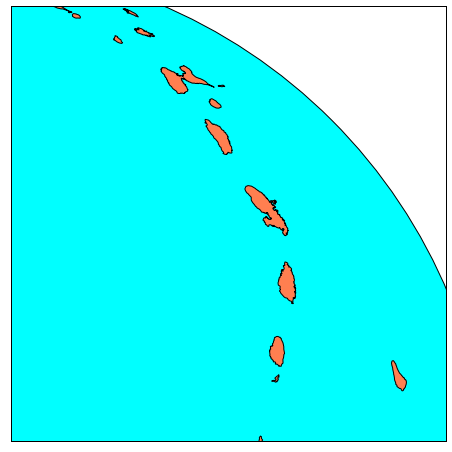

In [355]:
plt.figure(figsize=(8, 8))     
map = Basemap(satellite_height=60000.,
              projection='nsper', resolution='h', lat_0=12, lon_0=-64,
              llcrnrx=50000,llcrnry=50000,urcrnrx=400000,urcrnry=400000
    )
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

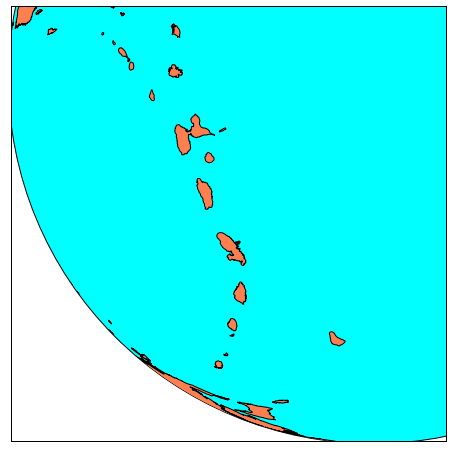

In [356]:
plt.figure(figsize=(8, 8))     
map = Basemap(satellite_height=80000.,
              projection='nsper', resolution='h', lat_0=17, lon_0=-59,
              llcrnrx=-500000,llcrnry=-500000,urcrnrx=100000,urcrnry=100000
    )
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

<AxesSubplot:>

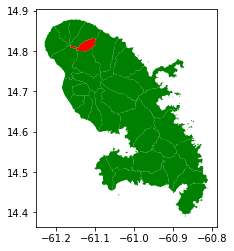

In [429]:

COMMUNES_FILES = 'data/communes-martinique.geojson'
gdf = gpd.read_file(COMMUNES_FILES)
gdf['color'] = 'green'
gdf.loc[0, 'color'] = 'red'
gdf
gdf.plot(color=gdf['color'])